In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Cancer detection - classification problem

In this project various methods explored for solving overfitting

* STEP 1 : Data preprocessing - Exploratory data analysis and Feature engineering
* STEP 2 : Model creation and training
    - Early stopping
    - Dropout implementation of solving overfitting 
    
* STEP 3 : Model evaluation


## STEP 1 : Data preprocessing - Exploratory data analysis and Feature engineering

In [60]:
df = pd.read_csv('DATA/03_data_classification_cancer_classification.csv')
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [61]:
#About the data - Statistics
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [62]:
#Check for no-data elements
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

In [63]:
#Check data shape
df.shape

(569, 31)

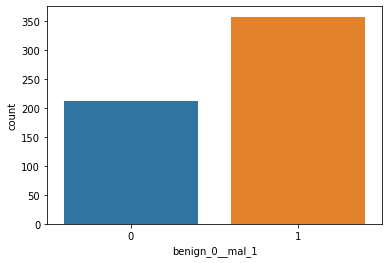

In [64]:
#See how balanced is the labeled data
sns.countplot(df['benign_0__mal_1'])
#Seems data is well balanced - bar heights are close

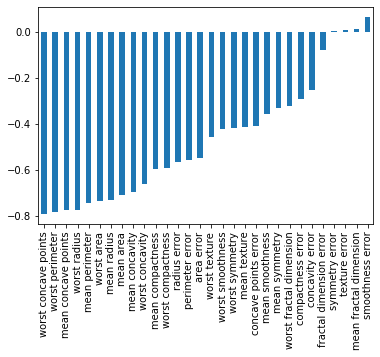

In [65]:
#Check how feature data is correlated with o/p
df.corr()['benign_0__mal_1'][:-1].sort_values().plot.bar()
#Seems most of the features are highly correlated with o/p => Can expect very accurate predictions

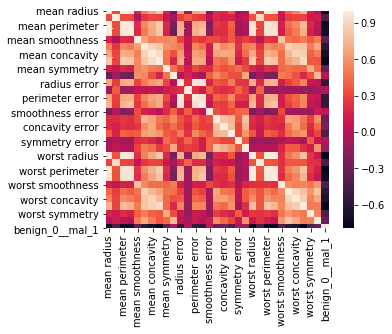

In [66]:
#Check correlation visually using heatmap
plt.figure(figsize = (5, 4))
sns.heatmap(df.corr())

## STEP 2 : Model creation and training

## Test train set split

In [72]:
from sklearn.model_selection import train_test_split
X = df.drop('benign_0__mal_1', axis = 1).values
y = df['benign_0__mal_1'].values
#Since we have verly less data (~500) keepling only 25% for validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 101)

## Scale features

In [73]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Creating the model

In [74]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
#Layer 1 with as many as features
num_feat = X_test.shape[1]
model.add(Dense(num_feat, activation = 'relu')) #30 units
#Layer 2 with half the number of features
model.add(Dense(int(num_feat/2), activation = 'relu')) #15 units
#O/P Layer
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'adam', loss = 'binary_crossentropy')

## Training the model - Over fitting, very large number of epochs

In [75]:
#Train model
model.fit(x = X_train, y = y_train, validation_data = (X_test, y_test), epochs = 500)

Train on 426 samples, validate on 143 samples
Epoch 1/500
426/426 [==============================] - 1s 1ms/sample - loss: 0.6800 - val_loss: 0.6702
Epoch 2/500
426/426 [==============================] - 0s 157us/sample - loss: 0.6564 - val_loss: 0.6469
Epoch 3/500
426/426 [==============================] - 0s 110us/sample - loss: 0.6268 - val_loss: 0.6163
Epoch 4/500
426/426 [==============================] - 0s 145us/sample - loss: 0.5930 - val_loss: 0.5785
Epoch 5/500
426/426 [==============================] - 0s 122us/sample - loss: 0.5527 - val_loss: 0.5327
Epoch 6/500
426/426 [==============================] - 0s 134us/sample - loss: 0.5064 - val_loss: 0.4816
Epoch 7/500
426/426 [==============================] - 0s 124us/sample - loss: 0.4559 - val_loss: 0.4286
Epoch 8/500
426/426 [==============================] - 0s 131us/sample - loss: 0.4067 - val_loss: 0.3763
Epoch 9/500
426/426 [==============================] - 0s 115us/sample - loss: 0.3629 - val_loss: 0.3317
Epoch 10/50

Epoch 78/500
426/426 [==============================] - 0s 120us/sample - loss: 0.0573 - val_loss: 0.0963
Epoch 79/500
426/426 [==============================] - 0s 106us/sample - loss: 0.0563 - val_loss: 0.0986
Epoch 80/500
426/426 [==============================] - 0s 108us/sample - loss: 0.0544 - val_loss: 0.0957
Epoch 81/500
426/426 [==============================] - 0s 113us/sample - loss: 0.0534 - val_loss: 0.1021
Epoch 82/500
426/426 [==============================] - 0s 125us/sample - loss: 0.0535 - val_loss: 0.0984
Epoch 83/500
426/426 [==============================] - 0s 103us/sample - loss: 0.0527 - val_loss: 0.0992
Epoch 84/500
426/426 [==============================] - 0s 115us/sample - loss: 0.0526 - val_loss: 0.0976
Epoch 85/500
426/426 [==============================] - 0s 115us/sample - loss: 0.0523 - val_loss: 0.0970
Epoch 86/500
426/426 [==============================] - 0s 115us/sample - loss: 0.0532 - val_loss: 0.0946
Epoch 87/500
426/426 [========================

Epoch 155/500
426/426 [==============================] - 0s 115us/sample - loss: 0.0407 - val_loss: 0.1039
Epoch 156/500
426/426 [==============================] - 0s 110us/sample - loss: 0.0412 - val_loss: 0.1137
Epoch 157/500
426/426 [==============================] - 0s 183us/sample - loss: 0.0413 - val_loss: 0.1019
Epoch 158/500
426/426 [==============================] - 0s 136us/sample - loss: 0.0407 - val_loss: 0.1080
Epoch 159/500
426/426 [==============================] - 0s 106us/sample - loss: 0.0403 - val_loss: 0.1069
Epoch 160/500
426/426 [==============================] - 0s 106us/sample - loss: 0.0417 - val_loss: 0.1011
Epoch 161/500
426/426 [==============================] - 0s 120us/sample - loss: 0.0408 - val_loss: 0.1147
Epoch 162/500
426/426 [==============================] - 0s 106us/sample - loss: 0.0419 - val_loss: 0.1056
Epoch 163/500
426/426 [==============================] - 0s 113us/sample - loss: 0.0394 - val_loss: 0.1119
Epoch 164/500
426/426 [==============

426/426 [==============================] - 0s 108us/sample - loss: 0.0364 - val_loss: 0.1206
Epoch 232/500
426/426 [==============================] - 0s 117us/sample - loss: 0.0347 - val_loss: 0.1113
Epoch 233/500
426/426 [==============================] - 0s 108us/sample - loss: 0.0320 - val_loss: 0.1141
Epoch 234/500
426/426 [==============================] - 0s 117us/sample - loss: 0.0318 - val_loss: 0.1169
Epoch 235/500
426/426 [==============================] - 0s 110us/sample - loss: 0.0329 - val_loss: 0.1123
Epoch 236/500
426/426 [==============================] - 0s 113us/sample - loss: 0.0346 - val_loss: 0.1249
Epoch 237/500
426/426 [==============================] - 0s 113us/sample - loss: 0.0384 - val_loss: 0.1097
Epoch 238/500
426/426 [==============================] - 0s 113us/sample - loss: 0.0337 - val_loss: 0.1184
Epoch 239/500
426/426 [==============================] - 0s 113us/sample - loss: 0.0336 - val_loss: 0.1137
Epoch 240/500
426/426 [============================

426/426 [==============================] - 0s 129us/sample - loss: 0.0270 - val_loss: 0.1394
Epoch 308/500
426/426 [==============================] - 0s 122us/sample - loss: 0.0281 - val_loss: 0.1221
Epoch 309/500
426/426 [==============================] - 0s 110us/sample - loss: 0.0262 - val_loss: 0.1406
Epoch 310/500
426/426 [==============================] - 0s 106us/sample - loss: 0.0271 - val_loss: 0.1324
Epoch 311/500
426/426 [==============================] - 0s 106us/sample - loss: 0.0256 - val_loss: 0.1245
Epoch 312/500
426/426 [==============================] - 0s 106us/sample - loss: 0.0255 - val_loss: 0.1382
Epoch 313/500
426/426 [==============================] - 0s 113us/sample - loss: 0.0250 - val_loss: 0.1231
Epoch 314/500
426/426 [==============================] - 0s 115us/sample - loss: 0.0255 - val_loss: 0.1303
Epoch 315/500
426/426 [==============================] - 0s 117us/sample - loss: 0.0285 - val_loss: 0.1373
Epoch 316/500
426/426 [============================

426/426 [==============================] - 0s 127us/sample - loss: 0.0253 - val_loss: 0.1400
Epoch 384/500
426/426 [==============================] - 0s 106us/sample - loss: 0.0221 - val_loss: 0.1311
Epoch 385/500
426/426 [==============================] - 0s 106us/sample - loss: 0.0212 - val_loss: 0.1498
Epoch 386/500
426/426 [==============================] - 0s 120us/sample - loss: 0.0201 - val_loss: 0.1435
Epoch 387/500
426/426 [==============================] - 0s 131us/sample - loss: 0.0213 - val_loss: 0.1308
Epoch 388/500
426/426 [==============================] - 0s 131us/sample - loss: 0.0198 - val_loss: 0.1565
Epoch 389/500
426/426 [==============================] - 0s 122us/sample - loss: 0.0205 - val_loss: 0.1408
Epoch 390/500
426/426 [==============================] - 0s 103us/sample - loss: 0.0204 - val_loss: 0.1387
Epoch 391/500
426/426 [==============================] - 0s 134us/sample - loss: 0.0202 - val_loss: 0.1469
Epoch 392/500
426/426 [============================

426/426 [==============================] - 0s 124us/sample - loss: 0.0162 - val_loss: 0.1599
Epoch 460/500
426/426 [==============================] - 0s 120us/sample - loss: 0.0159 - val_loss: 0.1579
Epoch 461/500
426/426 [==============================] - 0s 120us/sample - loss: 0.0156 - val_loss: 0.1680
Epoch 462/500
426/426 [==============================] - 0s 115us/sample - loss: 0.0161 - val_loss: 0.1585
Epoch 463/500
426/426 [==============================] - 0s 122us/sample - loss: 0.0164 - val_loss: 0.1764
Epoch 464/500
426/426 [==============================] - 0s 124us/sample - loss: 0.0165 - val_loss: 0.1525
Epoch 465/500
426/426 [==============================] - 0s 117us/sample - loss: 0.0162 - val_loss: 0.1726
Epoch 466/500
426/426 [==============================] - 0s 117us/sample - loss: 0.0163 - val_loss: 0.1598
Epoch 467/500
426/426 [==============================] - 0s 120us/sample - loss: 0.0157 - val_loss: 0.1626
Epoch 468/500
426/426 [============================

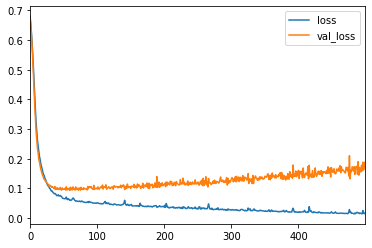

In [76]:
#Visualize loss curves
losses = pd.DataFrame(model.history.history)
losses.plot()

## Clearly it is an overfitting scenario 
- Where training loss is always decreasing and
- Validation loss started increasing after hitting minimum

Solutions
- Early stopping limits the number of trainable epochs
- Dropouts can reduce overfitting problem

## Early stopping

#### Create new model again

In [83]:
#Create model again 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
#Layer 1 with as many as features
num_feat = X_test.shape[1]
model.add(Dense(num_feat, activation = 'relu')) #30 units
#Layer 2 with half the number of features
model.add(Dense(int(num_feat/2), activation = 'relu')) #15 units
#O/P Layer
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'adam', loss = 'binary_crossentropy')

#### Create call back for early stopping

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
#patience = 25 (wai for 25 epochs even after validation_loss reaches its minimum
#mode = min (check for validation_loss min condition)
cb_early_stop = EarlyStopping('val_loss', patience = 25, mode = 'min', verbose = 1)

#### Train model along with early stopping callback

In [84]:
model.fit(x = X_train, y = y_train, validation_data = (X_test, y_test), epochs = 500, callbacks = [cb_early_stop])

Train on 426 samples, validate on 143 samples
Epoch 1/500
426/426 [==============================] - 1s 2ms/sample - loss: 0.6783 - val_loss: 0.6612
Epoch 2/500
426/426 [==============================] - 0s 134us/sample - loss: 0.6401 - val_loss: 0.6284
Epoch 3/500
426/426 [==============================] - 0s 129us/sample - loss: 0.6077 - val_loss: 0.5958
Epoch 4/500
426/426 [==============================] - 0s 143us/sample - loss: 0.5709 - val_loss: 0.5525
Epoch 5/500
426/426 [==============================] - 0s 120us/sample - loss: 0.5253 - val_loss: 0.5027
Epoch 6/500
426/426 [==============================] - 0s 141us/sample - loss: 0.4751 - val_loss: 0.4472
Epoch 7/500
426/426 [==============================] - 0s 115us/sample - loss: 0.4232 - val_loss: 0.3951
Epoch 8/500
426/426 [==============================] - 0s 127us/sample - loss: 0.3761 - val_loss: 0.3495
Epoch 9/500
426/426 [==============================] - 0s 134us/sample - loss: 0.3374 - val_loss: 0.3105
Epoch 10/50

Epoch 78/500
426/426 [==============================] - 0s 129us/sample - loss: 0.0517 - val_loss: 0.1074
Epoch 79/500
426/426 [==============================] - 0s 122us/sample - loss: 0.0518 - val_loss: 0.1037
Epoch 80/500
426/426 [==============================] - 0s 122us/sample - loss: 0.0539 - val_loss: 0.1047
Epoch 81/500
426/426 [==============================] - 0s 136us/sample - loss: 0.0516 - val_loss: 0.1056
Epoch 82/500
426/426 [==============================] - 0s 127us/sample - loss: 0.0501 - val_loss: 0.1043
Epoch 00082: early stopping


#### Visualising model performance

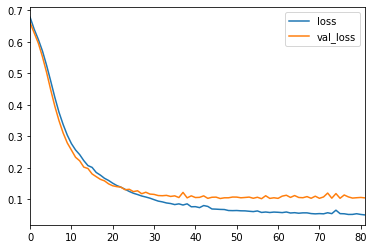

In [86]:
losses = pd.DataFrame(model.history.history)
losses.plot()

#### Early stopping can be observed in the above plot, as this will save some compilation time

## Solving overfitting using Dropouts

#### Create new model again - with dropouts. 25-50% droupout is a good number

In [90]:
#Create model again 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

model = Sequential()
#Layer 1 with as many as features
model.add(Dense(30, activation = 'relu')) #30 units
model.add(Dropout(0.5)) # 50% of the units are dropped out randomly in every epoch

#Layer 2 with half the number of features
model.add(Dense(15, activation = 'relu')) #15 units
model.add(Dropout(0.5)) # 50% of the units are dropped out randomly in every epoch

#O/P Layer
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'adam', loss = 'binary_crossentropy')

#### Create call back for early stopping

In [91]:
from tensorflow.keras.callbacks import EarlyStopping
#patience = 25 (wai for 25 epochs even after validation_loss reaches its minimum
#mode = min (check for validation_loss min condition)
cb_early_stop = EarlyStopping('val_loss', patience = 25, mode = 'min', verbose = 1)

#### Train model along with early stopping callback

In [92]:
model.fit(x = X_train, y = y_train, validation_data = (X_test, y_test), epochs = 500, callbacks = [cb_early_stop])

Train on 426 samples, validate on 143 samples
Epoch 1/500
426/426 [==============================] - 1s 3ms/sample - loss: 0.7344 - val_loss: 0.6859
Epoch 2/500
426/426 [==============================] - 0s 143us/sample - loss: 0.7041 - val_loss: 0.6644
Epoch 3/500
426/426 [==============================] - 0s 134us/sample - loss: 0.6659 - val_loss: 0.6466
Epoch 4/500
426/426 [==============================] - 0s 136us/sample - loss: 0.6572 - val_loss: 0.6308
Epoch 5/500
426/426 [==============================] - 0s 164us/sample - loss: 0.6392 - val_loss: 0.6126
Epoch 6/500
426/426 [==============================] - 0s 148us/sample - loss: 0.6251 - val_loss: 0.5919
Epoch 7/500
426/426 [==============================] - 0s 152us/sample - loss: 0.5931 - val_loss: 0.5634
Epoch 8/500
426/426 [==============================] - 0s 160us/sample - loss: 0.5792 - val_loss: 0.5328
Epoch 9/500
426/426 [==============================] - 0s 145us/sample - loss: 0.5481 - val_loss: 0.5021
Epoch 10/50

Epoch 78/500
426/426 [==============================] - 0s 157us/sample - loss: 0.1294 - val_loss: 0.1047
Epoch 79/500
426/426 [==============================] - 0s 185us/sample - loss: 0.1117 - val_loss: 0.0980
Epoch 80/500
426/426 [==============================] - 0s 195us/sample - loss: 0.1103 - val_loss: 0.0990
Epoch 81/500
426/426 [==============================] - 0s 148us/sample - loss: 0.1380 - val_loss: 0.1130
Epoch 82/500
426/426 [==============================] - 0s 136us/sample - loss: 0.1037 - val_loss: 0.0989
Epoch 83/500
426/426 [==============================] - 0s 122us/sample - loss: 0.1040 - val_loss: 0.1053
Epoch 84/500
426/426 [==============================] - 0s 164us/sample - loss: 0.1096 - val_loss: 0.0958
Epoch 85/500
426/426 [==============================] - 0s 164us/sample - loss: 0.1039 - val_loss: 0.0962
Epoch 86/500
426/426 [==============================] - 0s 143us/sample - loss: 0.1057 - val_loss: 0.0969
Epoch 87/500
426/426 [========================

426/426 [==============================] - 0s 136us/sample - loss: 0.0886 - val_loss: 0.0819
Epoch 155/500
426/426 [==============================] - 0s 150us/sample - loss: 0.0746 - val_loss: 0.0819
Epoch 156/500
426/426 [==============================] - 0s 129us/sample - loss: 0.0935 - val_loss: 0.0926
Epoch 157/500
426/426 [==============================] - 0s 124us/sample - loss: 0.0962 - val_loss: 0.0939
Epoch 158/500
426/426 [==============================] - 0s 124us/sample - loss: 0.0816 - val_loss: 0.0846
Epoch 159/500
426/426 [==============================] - 0s 136us/sample - loss: 0.0944 - val_loss: 0.0903
Epoch 160/500
426/426 [==============================] - 0s 120us/sample - loss: 0.0718 - val_loss: 0.0893
Epoch 161/500
426/426 [==============================] - 0s 131us/sample - loss: 0.0844 - val_loss: 0.0892
Epoch 162/500
426/426 [==============================] - 0s 127us/sample - loss: 0.0984 - val_loss: 0.0855
Epoch 163/500
426/426 [============================

#### Visualising model performance

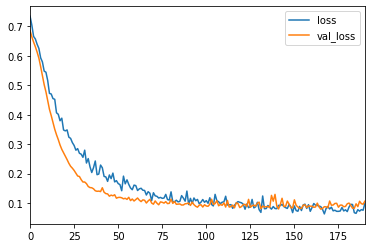

In [93]:
losses = pd.DataFrame(model.history.history)
losses.plot()

#### Model seems properly trained, as we can see training and validation losses are keep on decreasing

## Model evaluation

In [96]:
y_pred = model.predict_classes(X_test)

#### Model evaluation metrics for classification problem

In [98]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96        55
           1       0.99      0.95      0.97        88

    accuracy                           0.97       143
   macro avg       0.96      0.97      0.96       143
weighted avg       0.97      0.97      0.97       143



In [99]:
print(confusion_matrix(y_test, y_pred))

[[54  1]
 [ 4 84]]
